# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Singapore, None, Singapore**, or **Singapore** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Singapore, None, Singapore** to Ann Arbor, USA. In that case at least one source file must be about **Singapore, None, Singapore**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Singapore, None, Singapore** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# Daily Climate Records of Singapore and Ann Arbor, Michigan, United States

##### Region:
Singapore   
Ann Arbor, Michigan, USA

##### Category:
Weather Phenomena

##### Reference:
http://www.weather.gov.sg/climate-historical-daily/  
https://www.ncdc.noaa.gov/cdo-web/search

##### Purpose
What is the difference of daily climate records from 2005 till 2014 for these two regions?  
How the climate records were broken in 2015 for these two regions?

# Singapore

Dataset has been extracted from http://www.weather.gov.sg/climate-historical-daily/ and stored in Singapore_Changi_Daily_Temperature.csv

#### Data Preprocessing

Take a look at our data for Singapore

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

df = pd.read_csv('Singapore_Changi_Daily_Temperature.csv')
df.head()

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,Changi,2005,1,1,11.8,—,—,—,26.1,27.7,24.8,9.8,34.9
1,Changi,2005,1,2,96.7,—,—,—,24.7,26.1,23.2,7.2,28.8
2,Changi,2005,1,3,0.1,—,—,—,25.9,29.2,23.5,7.2,29.5
3,Changi,2005,1,4,13.4,—,—,—,26.5,29.4,24.2,8.3,29.2
4,Changi,2005,1,5,0.3,—,—,—,26.5,30.2,23.7,8.8,35.3


Remove Leap Year

In [2]:
s1=df.shape
df=df[~((df['Month']==2)&(df['Day']==29))]
s2=df.shape
print('Remove {} series of data successfully'.format(s1[0]-s2[0]))

Remove 6 series of data successfully


Grouping Our Data

In [3]:
SG_max=df[['Month','Day','Maximum Temperature (°C)']]
SG_min=df[['Month','Day','Minimum Temperature (°C)']]

Maximum Temperature of 2005-2014

In [4]:
SG_max_20052014=SG_max[(df['Year']>=2005)&(df['Year']<2015)].groupby(['Month','Day']).aggregate({'Maximum Temperature (°C)':np.max})
SG_max_20052014.head()

Maximum Temperature (°C)
Month Day                          
1     1                        33.7
      2                        32.8
      3                        33.4
      4                        32.2
      5                        33.7

Minimum Temperature of 2005-2014

In [5]:
SG_min_20052014=SG_min[(df['Year']>=2005)&(df['Year']<2015)].groupby(['Month','Day']).aggregate({'Minimum Temperature (°C)':np.min})
SG_min_20052014.head()

Minimum Temperature (°C)
Month Day                          
1     1                        23.0
      2                        22.7
      3                        22.6
      4                        22.0
      5                        22.1

Maximum Temperature of 2015

In [6]:
SG_max_2015=SG_max[(df['Year']==2015)].groupby(['Month','Day']).aggregate({'Maximum Temperature (°C)':np.max})
SG_max_2015.head()

Maximum Temperature (°C)
Month Day                          
1     1                        28.2
      2                        31.0
      3                        31.9
      4                        32.3
      5                        33.8

Minimum Temperature of 2015

In [7]:
SG_min_2015=SG_min[(df['Year']==2015)].groupby(['Month','Day']).aggregate({'Minimum Temperature (°C)':np.min})
SG_min_2015.head()

Minimum Temperature (°C)
Month Day                          
1     1                        23.3
      2                        23.5
      3                        22.8
      4                        22.8
      5                        22.8

Broken Records

In [8]:
SG_broken_max=np.where(SG_max_2015['Maximum Temperature (°C)']>SG_max_20052014['Maximum Temperature (°C)'])[0]
SG_broken_min=np.where(SG_min_2015['Minimum Temperature (°C)']<SG_min_20052014['Minimum Temperature (°C)'])[0]

#### Plotting

<IPython.core.display.Javascript object>


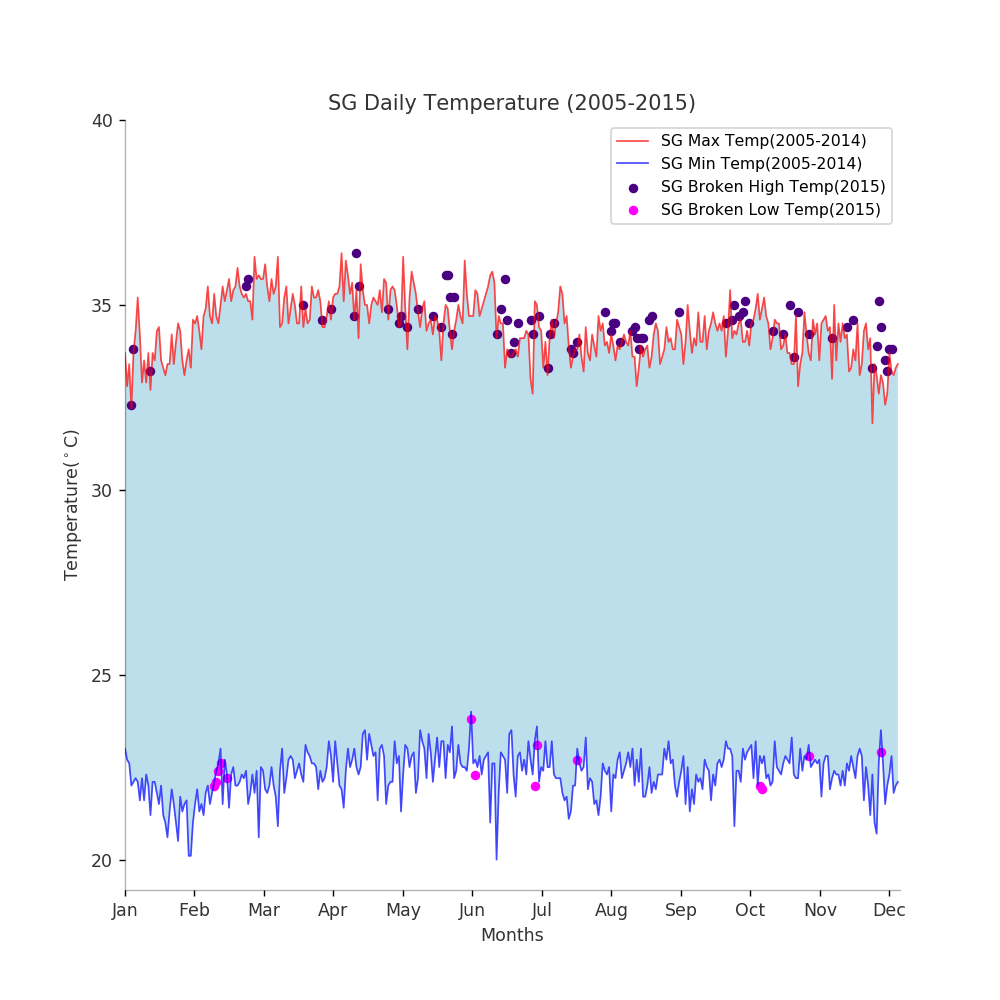

In [9]:
plt.figure(figsize=(8,8))

# line graph of 2005-2014
plt.plot(SG_max_20052014.values, label='SG Max Temp(2005-2014)',linewidth=1, alpha=0.7, c='red')
plt.plot(SG_min_20052014.values, label='SG Min Temp(2005-2014)',linewidth=1, alpha=0.7, c='blue')

# Shaded area
plt.gca().fill_between(range(len(SG_max_20052014)), SG_min_20052014['Minimum Temperature (°C)'], SG_max_20052014['Maximum Temperature (°C)'], facecolor='lightblue', alpha=0.8)

# Scatterplot of 2015
plt.scatter(SG_broken_max, SG_max_2015.iloc[SG_broken_max], s=20, color='indigo',label='SG Broken High Temp(2015)')
plt.scatter(SG_broken_min, SG_min_2015.iloc[SG_broken_min], s=20, color='magenta',label='SG Broken Low Temp(2015)')

# Legend
plt.legend(loc='best', fontsize=9)

plt.xticks(np.linspace(0, 30+30*11, num=12), (r'Jan',r'Feb',r'Mar',r'Apr',r'May',r'Jun',r'Jul',r'Aug',r'Sep',r'Oct',r'Nov',r'Dec'),alpha=0.8)
plt.yticks(np.linspace(20, 40, 5), alpha=0.8)
plt.xlim(0,365)
plt.xlabel('Months',alpha=0.8)
plt.ylabel('Temperature($^\circ$C)',alpha=0.8)
plt.title('SG Daily Temperature (2005-2015)',alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_alpha(0.3)
plt.gca().spines['left'].set_alpha(0.3)

# Ann Arbor, Michigan, United States

Dataset has been extracted from https://www.ncdc.noaa.gov/cdo-web/search and stored in the file data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv.

#### Data Preprocessing

Take a look at our data for Ann Arbor, Michigan, United States

In [10]:
binsize=400
hashid= 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89'
df1 = pd.read_csv('data/C2A2_data/BinnedCsvs_d{}/{}.csv'.format(binsize,hashid))

df1.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


Convert Date into Year,Month,Day

In [11]:
df1['Data_Value']=df1['Data_Value'].apply(lambda x:x/10)
df1['Date']=pd.to_datetime(df1['Date'])
df1['Year']=df1['Date'].dt.year
df1['Month']=df1['Date'].dt.month
df1['Day']=df1['Date'].dt.day

df1.head()

,ID,Date,Element,Data_Value,Year,Month,Day
0,USW00094889,2014-11-12,TMAX,2.2,2014,11,12
1,USC00208972,2009-04-29,TMIN,5.6,2009,4,29
2,USC00200032,2008-05-26,TMAX,27.8,2008,5,26
3,USC00205563,2005-11-11,TMAX,13.9,2005,11,11
4,USC00200230,2014-02-27,TMAX,-10.6,2014,2,27


Remove Leap Year

In [12]:
s2=df1.shape
df1=df1[~((df1['Month']==2)&(df1['Day']==29))]
s3=df1.shape
print('Remove {} series of data successfully'.format(s2[0]-s3[0]))

Remove 83 series of data successfully


Grouping Our Data

Maximum Temperature of 2005-2014

In [13]:
USA_max_20052014=df1[(df1['Element']=='TMAX')&(df1['Year']>=2005)&(df1['Year']<2015)].groupby(['Month','Day']).aggregate({'Data_Value':np.max})
USA_max_20052014.head()

Data_Value
Month Day            
1     1          15.6
      2          13.9
      3          13.3
      4          10.6
      5          12.8

Minimum Temperature of 2005-2014

In [14]:
USA_min_20052014=df1[(df1['Element']=='TMIN')&(df1['Year']>=2005)&(df1['Year']<2015)].groupby(['Month','Day']).aggregate({'Data_Value':np.min})
USA_min_20052014.head()

Data_Value
Month Day            
1     1         -16.0
      2         -26.7
      3         -26.7
      4         -26.1
      5         -15.0

Maximum Temperature of 2015

In [15]:
USA_max_2015=df1[(df1['Element']=='TMAX')&(df1['Year']==2015)].groupby(['Month','Day']).aggregate({'Data_Value':np.max})
USA_max_2015.head()

Data_Value
Month Day            
1     1           1.1
      2           3.9
      3           3.9
      4           4.4
      5           2.8

Minimum Temperature of 2015

In [16]:
USA_min_2015=df1[(df1['Element']=='TMIN')&(df1['Year']==2015)].groupby(['Month','Day']).aggregate({'Data_Value':np.min})
USA_min_2015.head()

Data_Value
Month Day            
1     1         -13.3
      2         -12.2
      3          -6.7
      4          -8.8
      5         -15.5

Broken Records

In [17]:
USA_broken_max=np.where(USA_max_2015['Data_Value']>USA_max_20052014['Data_Value'])[0]
USA_broken_min=np.where(USA_min_2015['Data_Value']<USA_min_20052014['Data_Value'])[0]

#### Plotting

<IPython.core.display.Javascript object>


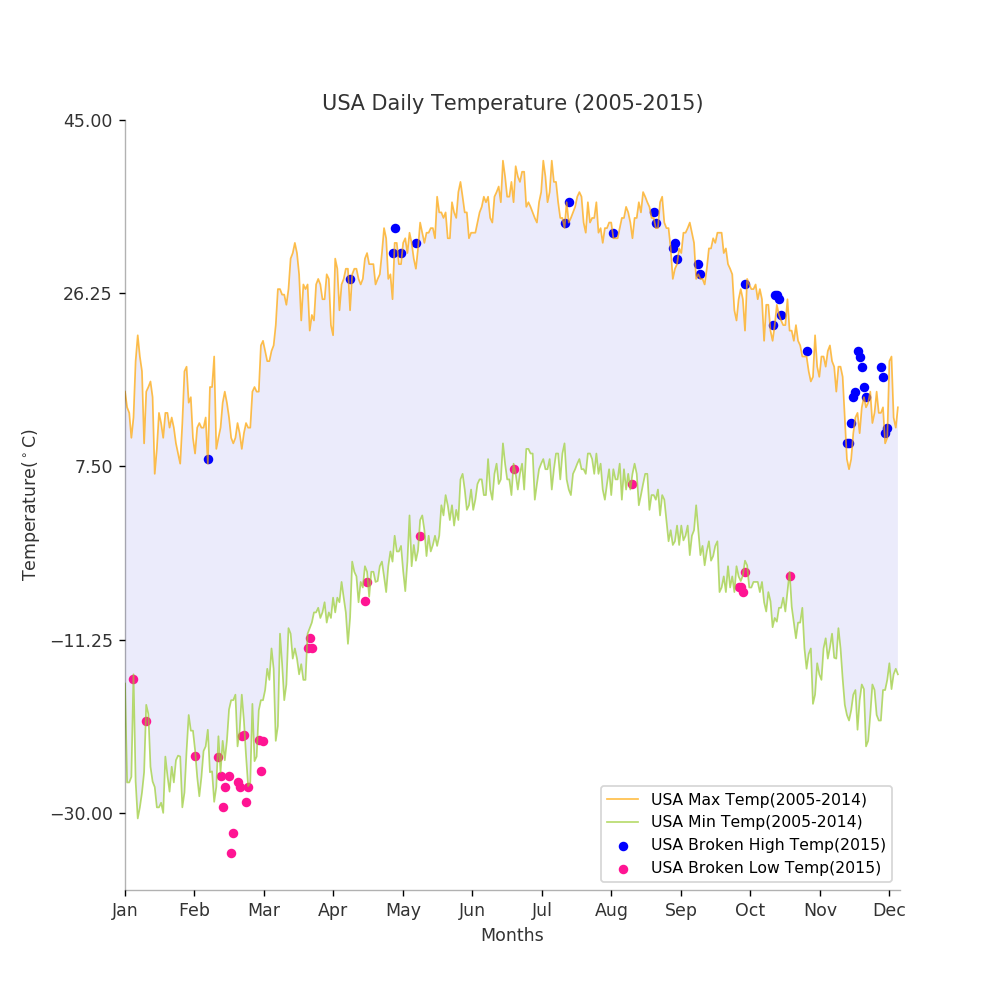

In [18]:
plt.figure(figsize=(8,8))

# Line Graph of 2005-2014
plt.plot(USA_max_20052014.values, label='USA Max Temp(2005-2014)',linewidth=1, alpha=0.7, c='orange')
plt.plot(USA_min_20052014.values, label='USA Min Temp(2005-2014)',linewidth=1, alpha=0.7, c='yellowgreen')

# Shaded area
plt.gca().fill_between(range(len(USA_max_20052014)), USA_min_20052014['Data_Value'], USA_max_20052014['Data_Value'], facecolor='lavender', alpha=0.8)

# Scatterplot of 2015
plt.scatter(USA_broken_max, USA_max_2015.iloc[USA_broken_max], s=20, color='blue',label='USA Broken High Temp(2015)')
plt.scatter(USA_broken_min, USA_min_2015.iloc[USA_broken_min], s=20, color='deeppink',label='USA Broken Low Temp(2015)')

# Legend
plt.legend(loc='best', fontsize=9)

plt.xticks(np.linspace(0, 30+30*11, num=12), (r'Jan',r'Feb',r'Mar',r'Apr',r'May',r'Jun',r'Jul',r'Aug',r'Sep',r'Oct',r'Nov',r'Dec'),alpha=0.8)
plt.yticks(np.linspace(-30, 45, 5), alpha=0.8)
plt.xlim(0,365)
plt.xlabel('Months',alpha=0.8)
plt.ylabel('Temperature($^\circ$C)',alpha=0.8)
plt.title('USA Daily Temperature (2005-2015)',alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_alpha(0.3)
plt.gca().spines['left'].set_alpha(0.3)

# Comparison

Plot two datasets together

<IPython.core.display.Javascript object>


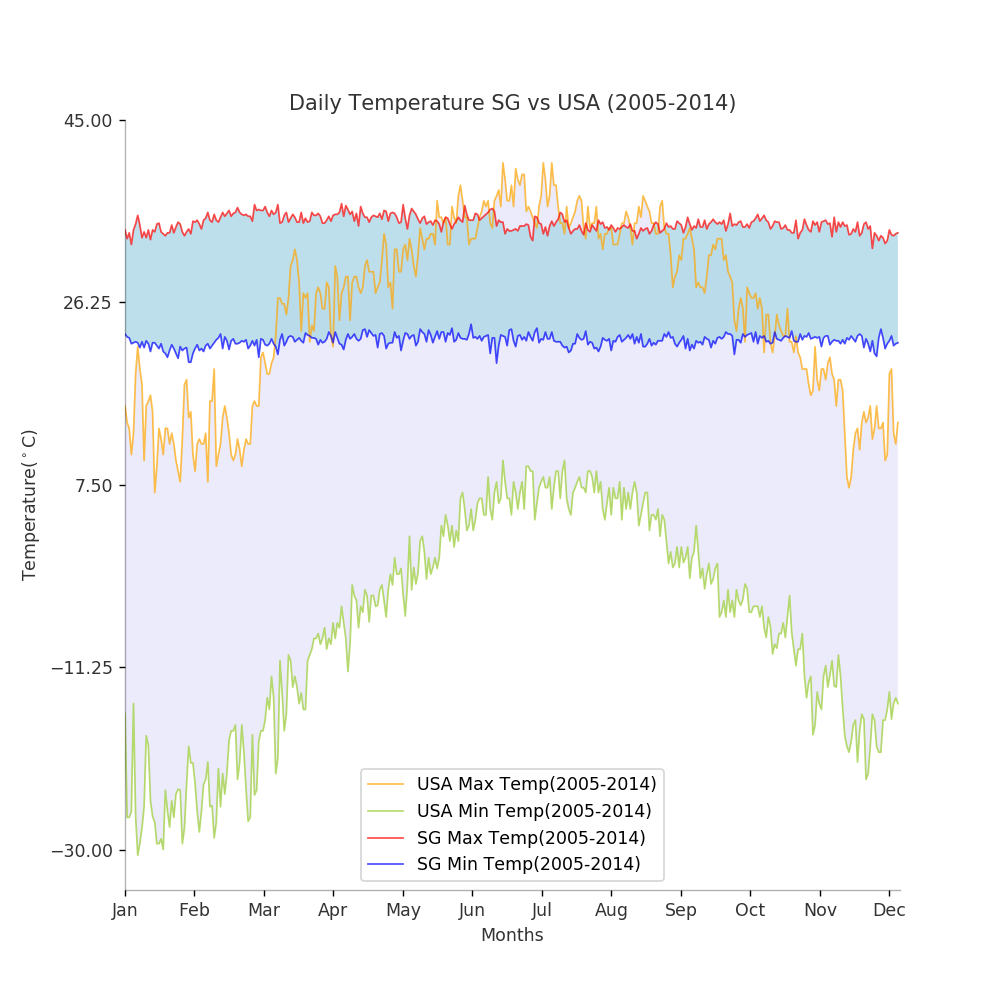

In [19]:
plt.figure(figsize=(8,8))

# Line Graph of 2005-2014
plt.plot(USA_max_20052014.values, label='USA Max Temp(2005-2014)',linewidth=1, alpha=0.7, c='orange')
plt.plot(USA_min_20052014.values, label='USA Min Temp(2005-2014)',linewidth=1, alpha=0.7, c='yellowgreen')
plt.plot(SG_max_20052014.values, label='SG Max Temp(2005-2014)',linewidth=1, alpha=0.7, c='red')
plt.plot(SG_min_20052014.values, label='SG Min Temp(2005-2014)',linewidth=1, alpha=0.7, c='blue')

# Shaded area
plt.gca().fill_between(range(len(USA_max_20052014)), USA_min_20052014['Data_Value'], USA_max_20052014['Data_Value'], facecolor='lavender', alpha=0.8)
plt.gca().fill_between(range(len(SG_max_20052014)), SG_min_20052014['Minimum Temperature (°C)'], SG_max_20052014['Maximum Temperature (°C)'], facecolor='lightblue', alpha=0.8)

# Scatterplot of 2015
#plt.scatter(USA_broken_max, USA_max_2015.iloc[USA_broken_max], s=20, color='blue',label='USA Broken High Temp(2015)')
#plt.scatter(USA_broken_min, USA_min_2015.iloc[USA_broken_min], s=20, color='deeppink',label='USA Broken Low Temp(2015)')
#plt.scatter(SG_broken_max, SG_max_2015.iloc[SG_broken_max], s=20, color='indigo',label='SG Broken High Temp(2015)')
#plt.scatter(SG_broken_min, SG_min_2015.iloc[SG_broken_min], s=20, color='magenta',label='SG Broken Low Temp(2015)')

# Legend
plt.legend(loc='best', fontsize=10)

plt.xticks(np.linspace(0, 30+30*11, num=12), (r'Jan',r'Feb',r'Mar',r'Apr',r'May',r'Jun',r'Jul',r'Aug',r'Sep',r'Oct',r'Nov',r'Dec'),alpha=0.8)
plt.yticks(np.linspace(-30, 45, 5), alpha=0.8)
plt.xlim(0,365)
plt.xlabel('Months',alpha=0.8)
plt.ylabel('Temperature($^\circ$C)',alpha=0.8)
plt.title('Daily Temperature SG vs USA (2005-2014)',alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_alpha(0.3)
plt.gca().spines['left'].set_alpha(0.3)

# Summary

Blue shaded area is the range between maximum and minimum daily temperature of Singapore from the period of 2005 till 2014.
Meanwhile, purple shaded area is of Ann Arbor, Michigan, United States.

##### What is the difference of daily climate records from 2005 till 2014 for these two regions?

From figure 3, we can clearly see that the daily temperature of Singapore roughly falls between 20°C and 37°C. On the other hand, the daily temperature of Ann Arbor, Michigan, United States varies throughout the year. 

The daily temperature of Singapore fluctuates within a narrow range is because of its geographical location. Singapore is located near equatorial and its climate is characterized by uniform temperature and pressure, high humidity and abundant rainfall. Singapore does not have clear-cut seasons like spring, summer, autumn and winter.

The daily temperature of Ann Arbor, Michigan, United States fluctuates within a wider range as it has a humid climate with large seasonal changes in temperature. Summers are warm and humid while winters are cold. 
 

##### How the climate records were broken in 2015 for these two regions?

The scatterplot has shown there are many broken records in 2015 for Singapore, especially maximum temperature. This means the weather in Singapore is getting hotter.

For Ann Arbor, Michigan, United States, there are many broken records of both maximum and minimum temperature, especially between February and March for minimum temperature in 2015. More broken records of maximum temperature can be observed between November and December.

Climate change in both regions maybe due to the increase in greenhouse emissions and this leads to more extreme weather, higher highs and lower lows. We can still expect cold waves and heat waves even greenhouse gases make the overall climate warmer over time. Climate change may be raising the odds of winter cold waves, this explains the broken records of minimum temperature in Ann Arbor, Michigan, United States.

Climate change does not affect one region or one country, but all over the world. Everyone, all countries have the responsibility to put in effort to make a change and to save our world.

